# Time Series Forecasting using SARIMA model 

##### By Gauri Purandare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

In [2]:
df = pd.read_csv("INR-USD.csv")

In [3]:
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000   
1     2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000   
2     2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002   
3     2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999   
4     2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001   
...          ...        ...        ...        ...        ...        ...   
1011  2023-04-17  81.844803  82.375504  81.844803  82.140900  82.140900   
1012  2023-04-24  82.054802  82.154900  81.603996  81.745399  81.745399   
1013  2023-05-01  81.744797  81.950996  81.616997  81.716103  81.716103   
1014  2023-05-08  81.729797  82.148499  81.673401  81.787102  81.787102   
1015  2023-05-10  82.037003  82.087502  81.884003  81.930000  81.930000   

      Volume  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [5]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1011,2023-04-17,81.844803,82.375504,81.844803,82.140900,82.140900,0.0
1012,2023-04-24,82.054802,82.154900,81.603996,81.745399,81.745399,0.0
1013,2023-05-01,81.744797,81.950996,81.616997,81.716103,81.716103,0.0
1014,2023-05-08,81.729797,82.148499,81.673401,81.787102,81.787102,0.0
1015,2023-05-10,82.037003,82.087502,81.884003,81.930000,81.930000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1016 non-null   object 
 1   Open       1013 non-null   float64
 2   High       1013 non-null   float64
 3   Low        1013 non-null   float64
 4   Close      1013 non-null   float64
 5   Adj Close  1013 non-null   float64
 6   Volume     1013 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.7+ KB


In [7]:
print(df.isnull().sum())

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


In [8]:
df1 = df.dropna()
print(df1)

            Date       Open       High        Low      Close  Adj Close  \
0     2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000   
1     2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000   
2     2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002   
3     2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999   
4     2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001   
...          ...        ...        ...        ...        ...        ...   
1011  2023-04-17  81.844803  82.375504  81.844803  82.140900  82.140900   
1012  2023-04-24  82.054802  82.154900  81.603996  81.745399  81.745399   
1013  2023-05-01  81.744797  81.950996  81.616997  81.716103  81.716103   
1014  2023-05-08  81.729797  82.148499  81.673401  81.787102  81.787102   
1015  2023-05-10  82.037003  82.087502  81.884003  81.930000  81.930000   

      Volume  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1013 non-null   object 
 1   Open       1013 non-null   float64
 2   High       1013 non-null   float64
 3   Low        1013 non-null   float64
 4   Close      1013 non-null   float64
 5   Adj Close  1013 non-null   float64
 6   Volume     1013 non-null   float64
dtypes: float64(6), object(1)
memory usage: 63.3+ KB


In [10]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,58.035208,58.506681,57.654706,58.056509,58.056509,0.0
std,12.614635,12.716632,12.565279,12.657407,12.657407,0.0
min,38.995998,39.334999,38.979000,39.044998,39.044998,0.0
25%,45.508999,45.775002,45.231998,45.498001,45.498001,0.0
50%,59.702999,60.342999,59.209999,59.840000,59.840000,0.0
75%,68.508499,69.099998,68.250000,68.538002,68.538002,0.0
max,82.917999,83.386002,82.563004,82.932999,82.932999,0.0


##### A line plot showin the change in exchange rate over the years

In [19]:
graph1 = px.line(df1, x="Date", 
                 y="Close", 
                 title='Change in currency exchange rate')
graph1.show()

##### Seasonal decomposition to determine the optimum model

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\gauri\AppData\Local\Temp\ipykernel_17008\2779596422.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 640x480 with 0 Axes>

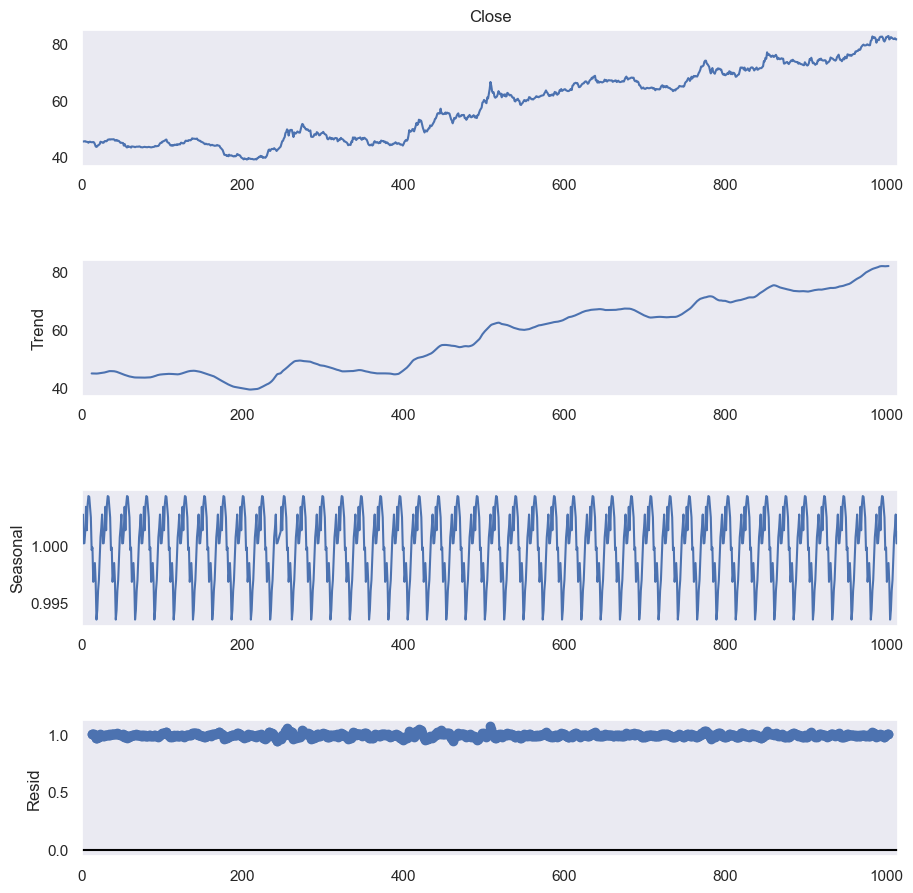

In [30]:
sd = seasonal_decompose(df1["Close"], model='multiplicative', period=24)
graph2 = plt.figure()  
graph2 = sd.plot()  
graph2.set_size_inches(10, 10)
graph2.show()

##### Now, we can see that there are seasonal components in the time series data. Thus, we will use the SARIMA model(Seasonal Autoregressive Integrated Moving Average model). In the model, we need to determine the values of p, d and q. Since the time series data is seasonal in nature, the value of d will be set to 1. To find the values of p and q, we need to plot the autocorrelation and partial autocorrelation graphs respectively. 

##### Importing the ARIMA python library to determine the values of p,d,q

In [31]:
from pmdarima.arima import auto_arima

In [32]:
model = auto_arima(df1['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


##### Here, we can see that p=2, d=1 and q=0

In [36]:
p, d, q = 2, 1, 0

##### Importing the SARIMA model, specifying the parameters and training the model

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model = SARIMAX(df1["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
m1 = model.fit() 
m1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Mon, 19 Jun 2023   AIC                           1821.594
Time:                                    11:02:38   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.193      0.233      -0.020       0.083
ar.L2          0.0643      0.026      2.481      0.013       0.013       0.115
ar.S.L52      -0.6358      0.026    -24.677      0.000      -0.686      -0.585
ar.S.L104     -0.3075      0.029    -10.602      0.000      -0.364      -0.251
sigma2         0.3767      0.013     28.481      0.000       0.351       0.403
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                86.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Now, predicting the future exchange rates

In [59]:
future = m1.predict(len(df1), len(df1)+300)
print(future)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1013     81.732805
1014     81.886990
1015     82.180317
1016     82.607756
1017     82.474244
           ...    
1309    100.298888
1310    100.565605
1311    100.566898
1312    100.793285
1313    100.503477
Name: predicted_mean, Length: 301, dtype: float64


In [60]:
future.tail(10)

1304    100.411000
1305    100.219600
1306     99.510139
1307     99.466775
1308     99.913943
1309    100.298888
1310    100.565605
1311    100.566898
1312    100.793285
1313    100.503477
Name: predicted_mean, dtype: float64

In [74]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1['Close'],
    mode='lines',
    name='Original data',
    line=dict(color='blue')
))


fig.add_trace(go.Scatter(
    x=future.index,
    y=future,
    mode='lines',
    name='Predictions',
    line=dict(color='red')
))

fig.update_layout(
    title="Graph depicting the old data and the predictions",
    xaxis_title="Record number in the dataset",
    yaxis_title="Closing exchange rate",
    legend_title="Records",
    width=1000,
    height=500
)

fig.show()

#### Thus, we can see that, the USD-INR currency exchange rate will linearly increase in the coming years.